In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.patches as patches
import matplotlib
import numpy as np

# Set working path
path = '/Users/martinbogaert/Desktop/NBA Data Analysis/nba_ai_awards/'

print('MAKE SURE YOU CHANGE THE WEEK VARIABLE')

MAKE SURE YOU CHANGE THE WEEK VARIABLE


In [4]:
week = 10 # CHANGE THIS
date = datetime.now().strftime('%d %B %Y')
time = datetime.now().strftime('%H:%M:%S')
print(date + ' ; ' + time)

27 December 2022 ; 23:32:59


In [7]:
tm_col = {'ATL': '#e03a3e', 'BOS': 'green','BRK': 'gray','CHI': '#ce1141','CHO': 'aqua','CLE': 'maroon','DAL': 'cornflowerblue',
          'DEN': 'indigo','DET': 'royalblue','GSW': 'gold','HOU': 'lightcoral','IND': 'yellow','LAC': 'silver','LAL': '#fdb927','MEM': 'skyblue','MIA': 'hotpink',
          'MIL': '#00471b','MIN': 'lime','NOP': 'goldenrod','NYK': 'darkorange','OKC': 'dodgerblue','ORL': 'navy',
          'PHI': 'blue','PHO': 'orange','POR': '#cf0a2c','SAC': 'mediumslateblue','SAS': 'white','TOR': 'purple',
          'UTA': 'forestgreen','WAS': 'midnightblue'}

# Funcion to plot the award race

# Calling the function

In [4]:
def award_race(award, week, ylim_min = 0, ylim_max = 1, x_edge = 0.2, fx = 14, fy = 8,
               ydiv = 4, save = False):  

               # fig_height : defines max limit of shares, x_edge : defines space on left/right of first/last week
               # fx, fy : figure size, ydiv = y-axis divided in ydiv-th sections, save : set to True to save the figure
    
    # Set figure colors
    txtcol, facecol = 'white', 'black'
    
    # Initiate figure
    fig, ax = plt.subplots(figsize = (fx, fy), facecolor = facecol)

    fig_len = - 0.1 + week - 1 + 2 * x_edge # Calculate figure length
    yticks = [i / ydiv for i in range(ydiv + 1)] # Define yticks
    ytickslab = [f'{i}/{ydiv}' if i not in [0,ydiv] else str(int(i/ydiv)) for i in range(ydiv + 1)] # Define yticks labels (as fractions)
    
    xticks = []; xlabs = [] # Initiate xticks lists
    for i in range(1, week + 1) : # Loop for all weeks ### changeeeee
        
        with open(path + f'Algorithm/weekly data/week_{i}.txt', 'r') as file: # Extract date of computing and season progress
            date1 = file.readline().splitlines()[0][7:] # Reduced date
            date2 = file.readline().splitlines()[0][7:] # Full date
            n = int(file.readline()[12:]) # Number of games played in the league
         
        xticks.append(i) # Append week number to xticks
        xlabs.append(date1 + '\n' + 'week ' + str(i)) # Save xticks label
        df = pd.read_csv(path + f'Results/{award}/results_week_{i}.csv').head(5) # Read top 5 players by predicted shares for the looped week
        
        share_prev = 2 # Initiate the share of the previously plotted player - this is to avoid player names written on top of each other
        ha = 'left' # Initiate direction of player name - again to avoid overlap issue
        for player, share, tm, idx in zip(df['Player'], df['Share'], df['Tm'], list(df.index)): # Loop for all top 5 players
        
            # If difference with previous player is less than 2% of the figure height, chnage player name direction
            if ((share_prev - share) < 0.03 * (ylim_max - ylim_min)) & (ha == 'left'):
                ha, has = 'right', -1
            elif ((share_prev - share) < 0.03 * (ylim_max - ylim_min)) & (ha == 'right') :
                ha, has = 'left', 1
            # Else, write name as usual
            else:
                ha, has = 'left', 1

            # Determine player name to be shown
            if player.split()[-1] in ['Jr.', 'Sr.', 'II', 'I', 'III']: # Players with suffixes
                name = player.split()[0][0] + '.' + player.split()[-2] + ' ' + player.split()[-1]
            else: # Other players
                name = player.split()[0][0] + '.' + player.split()[-1]
    
            # Scatter plot the weekly top 5 prediction
            plt.scatter(i, share, c = tm_col.get(tm), s = 100, alpha = 1)
            plt.annotate(name, xy = (i + fig_len*0.015*has, share), fontname = 'futura', va = 'center', ha = ha, size = 12, color = txtcol)
            share_prev = share # Keep memory of share
     
    ### FIGURE FORMATTING ###
    plt.grid(axis = 'y', alpha = 0.5, linestyle = ':', linewidth = 1.2, color = txtcol) # Add a grid
    plt.ylabel('Shares', fontname = 'futura', size = 18, color = txtcol) # Set y-label
    plt.xticks(xticks, xlabs, fontname = 'futura', size = 14, color = txtcol) # Set x-ticks
    plt.yticks(yticks, ytickslab, fontname = 'futura', size = 13, color = txtcol) # Set y-ticks
    plt.annotate(award.upper() + ' RACE', xy = (1/25, 0.9), fontname = 'futura', size = 28, xycoords = 'axes fraction', weight = 'bold', color = txtcol) # Figure title
    plt.annotate('as of ' + date2, xy = (1/25, 0.86), fontname = 'futura', size = 16, xycoords = 'axes fraction', color = txtcol, alpha = 0.8) # Figure subtitle
    plt.annotate(str(round(100*n/1230, 1)) + '%', xy = (0.26, 0.817), fontname = 'futura', size = 12, xycoords = 'axes fraction', color = txtcol) # Progress %
 #   plt.annotate('@nba.', xy = (0.27, 0.9), fontname = 'futura', size = 12, alpha = 1, xycoords = 'axes fraction', color = '#ff9000') # Signature
  #  plt.annotate('ai', xy = (0.36, 0.9), fontname = 'futura', size = 12, alpha = 1, xycoords = 'axes fraction', color = '#ff58c4') # Signature
    # Set figure limits
    plt.xlim([1 - x_edge + 0.1, week + x_edge + 0.1])
    plt.ylim([ylim_min, ylim_max])

    # Create progress bar
    rect_ = patches.Rectangle((0.037 * fig_len + 1 - x_edge + 0.1, ylim_min + 0.81*(ylim_max - ylim_min)), fig_len * 0.214, 0.035*(ylim_max - ylim_min), facecolor = 'none', edgecolor = 'white', linewidth = 1.5)
   # rect = patches.Rectangle((0.04 * fig_len + 0.8, 0.815), fig_len * 0.20625, 0.025, facecolor = 'none', edgecolor = 'black', linewidth = 0.5)
    prog = patches.Rectangle((0.04 * fig_len + 1 - x_edge + 0.1, ylim_min + 0.815*(ylim_max - ylim_min)), fig_len * 0.20625 * n/1230, 0.025*(ylim_max - ylim_min), facecolor = '#ff58c4', edgecolor = 'black', linewidth = 1.5, hatch = '///')
    ax.add_patch(rect_)
    ax.add_patch(prog)
    
    # Set axes, figure color
    ax.spines['left'].set_color(txtcol); ax.spines['right'].set_color(txtcol)
    ax.spines['bottom'].set_color(txtcol); ax.spines['top'].set_color(txtcol) 
    ax_gca = plt.gca()
    ax_gca.set_facecolor(facecol)
    
    #newax = fig.add_axes([0.8,0.8,0.04,0.04], zorder = 1)
   # newax.imshow(plt.imread('/Users/martinbogaert/Desktop/IMG_0128.jpg'))
  #  newax.axis('off')
    
    if save: # save figure if input True
        plt.savefig(path + f'Results/{award}/race_week_{week}.jpeg', dpi = 400)
        
    plt.show()

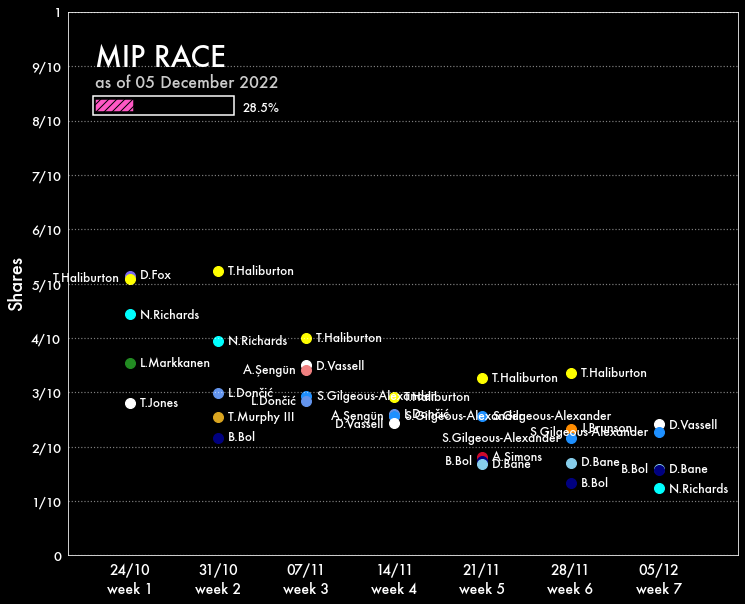

In [29]:
award_race('mip', 7, x_edge = 0.8, ylim_min = 0, ylim_max = 1, ydiv = 10, fx = 12, fy = 10, save = False)

In [5]:
def player_race(award, week, xtraplayers = [], txtcol = 'white', facecol = 'black', ymax = 1, fx = 10, fy = 10,
                    legloc = 'upper left', ncols = 1, save = False):

    matplotlib.rc('font', family = 'futura')
    fig_len = week + 0.2
    ls_dic = {0: '-', 1: '-.', 2: ':', 3: '--'}


    top5 = pd.read_csv(path + f'Results/{award}/results_week_{week}.csv').sort_values('Share', ascending = False).head(5)
    players = list(top5.Player) + xtraplayers

    # Initiate figure
    fig, ax = plt.subplots(figsize = (fx, fy), facecolor = facecol)
    
    dfs = [] # Collect all past weeks results
    xticks, xlabs = [], [] # Initiate xticks lists
    for i in range(1, week + 1) : # Loop for all weeks
        df = pd.read_csv(path + f'Results/{award}/results_week_{i}.csv')
        for player in players :
            if player not in list(df.Player) :
                dummy_row = pd.DataFrame([[player] + (df.shape[1] - 2) * [np.nan] + [0.0]], columns = df.columns)
                df = pd.concat([df, dummy_row])
        dfs.append(df[df['Player'].isin(players)]) # Append all weeks results
        
        with open(path + f'Algorithm/weekly data/week_{i}.txt', 'r') as file: # Extract date of computing and season progress
            date1 = file.readline().splitlines()[0][7:] # Simple data
            date2 = file.readline().splitlines()[0][7:] # Long date
            n = int(file.readline()[12:]) # Number of total games played
            
        xticks.append(i) # Store weeks
        xlabs.append(date1 + '\n' + 'week ' + str(i)) # Save xticks label
    
    # Concatenate data for all weeks of input players
    data = pd.concat(dfs)

    rep_teams = []   
    for player in players : # Loop for all input players to plot their predicted shares against time

        player_data = data.groupby('Player').get_group(player) # Get data of looped player
        tm = player_data['Tm'].iloc[-1] # Set player team
        plt.plot(range(1, week +1) ,player_data['Share'], marker = 'o', c = tm_col.get(tm), linewidth = 3, label = player, linestyle = ls_dic.get(rep_teams.count(tm))) # Plot share vs. time of player
        rep_teams.append(tm)

    ### FIGURE FORMATTING ###
    plt.grid(axis = 'both', alpha = 3/4, linestyle = ':', color = txtcol) # Add a grid
    plt.ylabel('Shares', fontname = 'futura', size = 18, color = txtcol) # Set y-label
    plt.xticks(xticks, xlabs, fontname = 'futura', size = 14, color = txtcol) # Set x ticks
    plt.yticks([0, 1/5, 2/5, 3/5, 4/5, 1], ['0', '1/5', '2/5', '3/5', '4/5', '1'], fontname = 'futura', size = 13, color = txtcol)
  
    plt.annotate(award.upper() + ' RACE', xy = (1/25, 0.9), fontname = 'futura', size = 28, xycoords = 'axes fraction', weight = 'bold', color = txtcol) # Figure title
    plt.annotate('as of ' + date2, xy = (1/25, 0.86), fontname = 'futura', size = 16, xycoords = 'axes fraction', color = txtcol, alpha = 0.8) # Figure subtitle
    plt.annotate(str(round(100*n/1230, 1)) + '%', xy = (0.26, 0.817), fontname = 'futura', size = 12, xycoords = 'axes fraction', color = txtcol) # Progress %
    plt.xlim([0.9, week + 0.1]) # Set figure limits
    plt.legend(loc = legloc, fontsize = 13, labelcolor = txtcol, facecolor = facecol, edgecolor = txtcol, ncol = ncols, framealpha = 0)
     # Create progress bar
    rect_ = patches.Rectangle((0.0195 * fig_len + 1, 0 + 0.81*(ymax - 0)), week * 0.18, 0.035*(ymax - 0), facecolor = 'none', edgecolor = 'white', linewidth = 1.5)
    prog = patches.Rectangle((0.021 * fig_len + 1, 0 + 0.815*(ymax - 0)), week * 0.178 * n/1230, 0.025*(ymax - 0), facecolor = '#ff58c4', edgecolor = 'black', linewidth = 1.5, hatch = '///')
    ax.add_patch(rect_)
    ax.add_patch(prog)
    
    ax.spines['left'].set_color(txtcol)
    ax.spines['bottom'].set_color(txtcol) 
    ax.spines['right'].set_color(txtcol)
    ax.spines['top'].set_color(txtcol) 

    plt.ylim([-0.01, ymax])
    ax_gca = plt.gca()
    ax_gca.set_facecolor(facecol)

    if save: # save figure if input True
        plt.savefig(path + f'Results/{award}/race_week_{week}_line.jpeg', dpi = 400)
    
    plt.show()

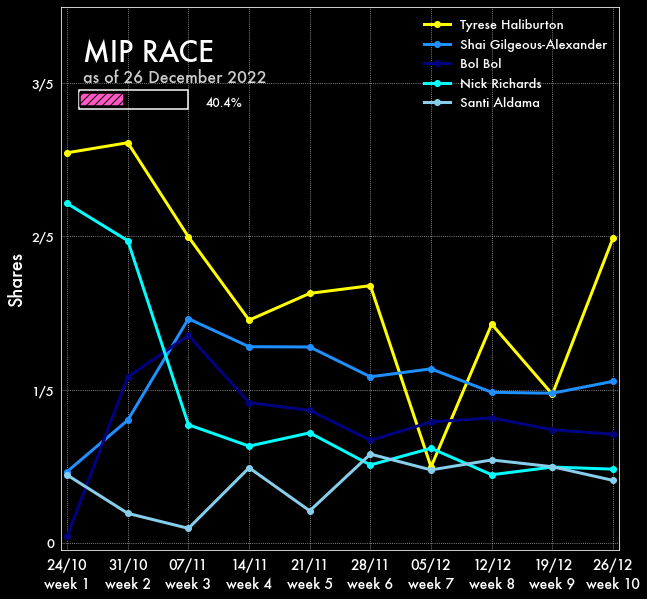

In [37]:
player_race('mip', week = 10, legloc = 'best', ymax = 0.7, ncols = 1,
            save = True)